## Import Dependencies

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
## load data
df=pd.read_csv(r'C:\Users\PC\OneDrive\Desktop\IRIS\IRIS-Project\IRIS.csv')

#### understanding data

In [44]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory data analysis

In [8]:

counter=df['species'].value_counts()
counter

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

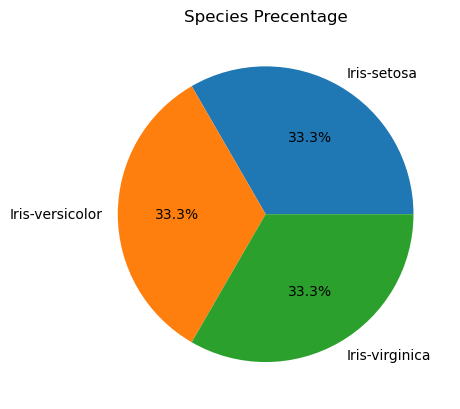

In [10]:
plt.title('Species Precentage')
plt.pie(counter, labels=df['species'].unique(),autopct='%1.1f%%')
plt.show()

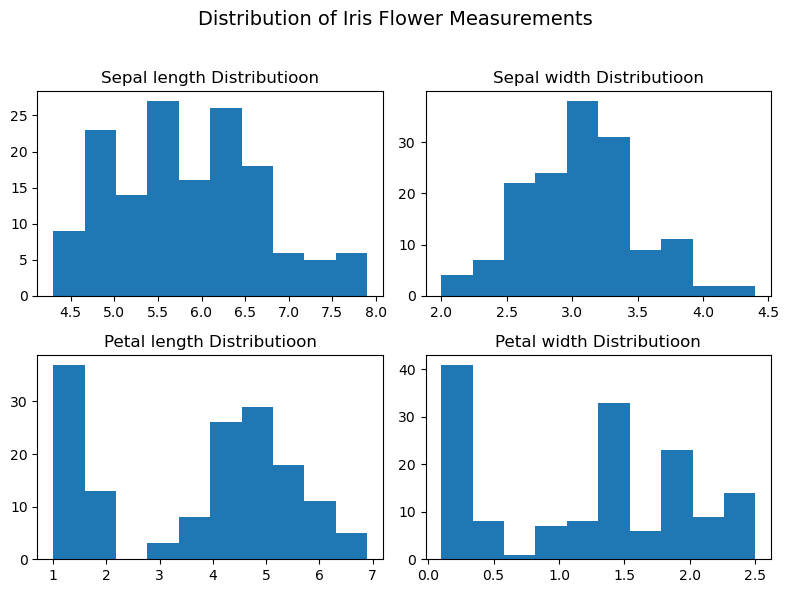

In [11]:
plt.figure(figsize=(8,6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)
             
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles=['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

for i, col in enumerate(columns):
             plt.subplot(2,2,i+1)
             plt.hist(df[col])
             plt.title(f'{titles[i]} Distributioon')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()
             

##### sepal length vs sepal width

In [12]:
color= ['red', 'blue', 'green']
Species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

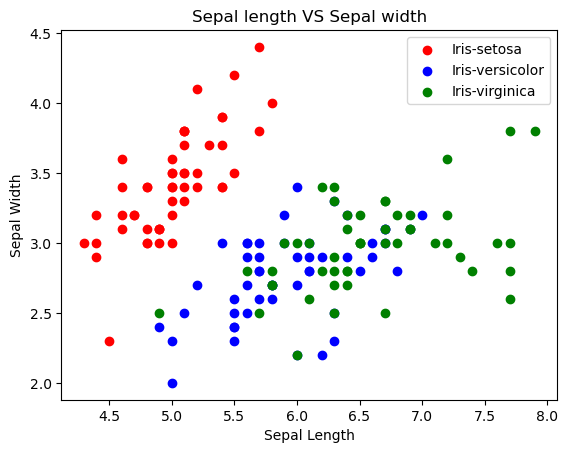

In [13]:
plt.title('Sepal length VS Sepal width')
for i in range (3):
#     sepal_length', 'sepal_width', 'petal_length', 'petal_width'
    x=df[df['species']==Species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=color[i], label=Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

###### Petal Length VS Petal Width

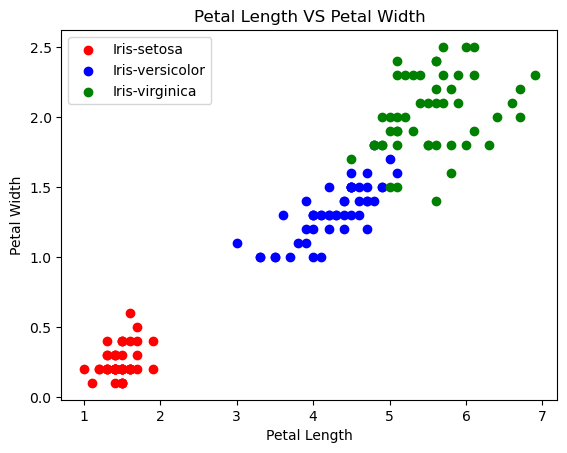

In [14]:
plt.title('Petal Length VS Petal Width')
for i in range (3):
#     sepal_length', 'sepal_width', 'petal_length', 'petal_width'
    x=df[df['species']==Species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=color[i], label=Species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

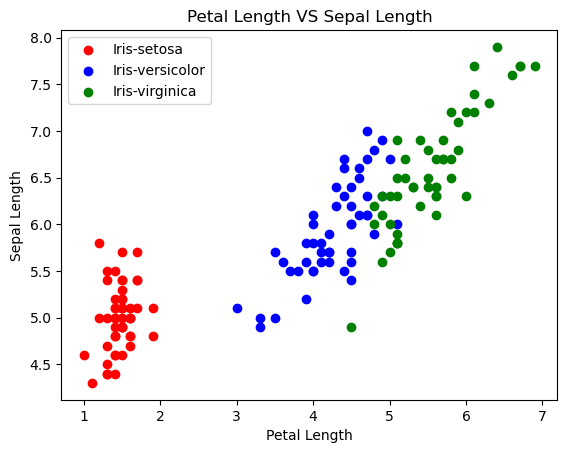

In [15]:
plt.title('Petal Length VS Sepal Length')
for i in range (3):
#     sepal_length', 'sepal_width', 'petal_length', 'petal_width'
    x=df[df['species']==Species[i]]
    plt.scatter(x['petal_length'], x['sepal_length'], c=color[i], label=Species[i])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()

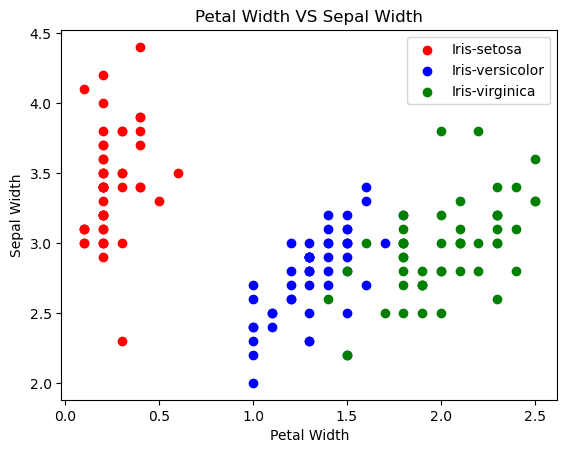

In [16]:
plt.title('Petal Width VS Sepal Width')
for i in range (3):
#     sepal_length', 'sepal_width', 'petal_length', 'petal_width'
    x=df[df['species']==Species[i]]
    plt.scatter(x['petal_width'], x['sepal_width'], c=color[i], label=Species[i])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

### Data Preprocessing

###### Label Encoding 

In [17]:

le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

###### Data Splitting

In [18]:
X= df.iloc[:, :-1]
y= df.iloc[: , -1]

In [19]:
X_train, X_test, y_train , y_test= train_test_split(X,y, test_size=0.2, shuffle=True)

In [20]:
X_test.shape, y_test.shape

((30, 4), (30,))

## Model Training

In [21]:
param_grid={'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
model= GridSearchCV(SVC(), param_grid, verbose=1)

In [22]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [23]:
model.best_params_

{'C': 1, 'gamma': 0.1}

### Model Evaluation

In [24]:
y_pred= model.predict(X_test)

In [25]:
accuracy_score(y_pred, y_test)

0.9666666666666667

<Axes: >

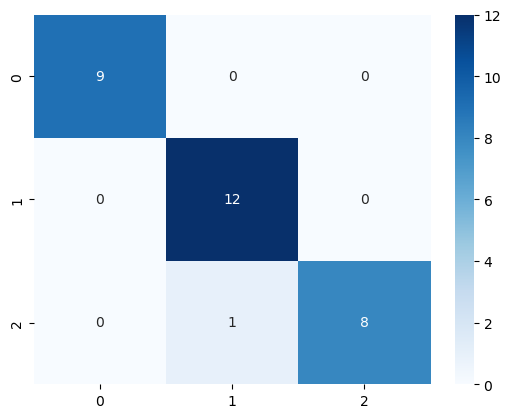

In [26]:
confusionMatrix= confusion_matrix(y_pred, y_test)
sns.heatmap(confusionMatrix, annot=True, cmap='Blues')

In [27]:
prediction = model.predict([[4.9, 3.0, 1.4, 0.2]])


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [35]:
prediction

array([0])

In [29]:
decode_labels= le.inverse_transform(prediction)
decode_labels

array(['Iris-setosa'], dtype=object)

In [38]:
import pickle

with open('Iris_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [39]:
with open('Iris_Model.pkl', 'rb') as file:
    loaded_model= pickle.load(file)

In [48]:
predicton= loaded_model.predict([[4.9, 3.0, 1.4, 0.2]])
prediction

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])